In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
from tensorflow import keras #we are going to code using keras
from keras.models import Sequential, Model #we can use Sequential or Model to define model
from keras.layers import Dense, BatchNormalization, Activation, Input #Importing layers which we will use in the model
from keras.utils.np_utils import to_categorical #for encoding target labels
from keras.callbacks import ReduceLROnPlateau #this will allow learning rate to be changed during training

In [3]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
import pandas as pd

import operator
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf

In [5]:
from tensorflow import keras

In [6]:
from keras.models import Sequential
from keras.models import Model


In [7]:
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Input

from keras.utils.np_utils import to_categorical


In [8]:
from keras.callbacks import ReduceLROnPlateau

In [9]:
train = pd.read_csv("../input/digit-recognizer/train.csv",header="infer")

In [10]:
test = pd.read_csv("../input/digit-recognizer/test.csv",header="infer")

In [11]:
train.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
35776,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1748,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14797,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5052,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10205,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
test.sample(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_train_full = train.values
X_test=test.values

In [14]:
print(type(X_train_full),"\nShape:",X_train_full.shape)

<class 'numpy.ndarray'> 
Shape: (42000, 785)


In [15]:
print(type(X_test),"\nShape:",X_test.shape)

<class 'numpy.ndarray'> 
Shape: (28000, 784)


In [16]:
y_train=X_train_full[:,0]
X_train=X_train_full[:,1:]

In [17]:
print(type(X_train),"\nShape:",X_train.shape)

<class 'numpy.ndarray'> 
Shape: (42000, 784)


In [18]:
print(type(y_train),"\nShape:",y_train.shape)

<class 'numpy.ndarray'> 
Shape: (42000,)


In [19]:
#del X_train_full

In [20]:
X_train = (X_train-127.5)/127.5

In [21]:
X_test = (X_test-127.5)/127.5

In [22]:
y_train[5:10,]

array([0, 7, 3, 5, 3])

In [23]:
y_train = to_categorical(y_train)

In [24]:
print(type(y_train),"\nShape:",y_train.shape)

<class 'numpy.ndarray'> 
Shape: (42000, 10)


In [25]:
#setup callback
reduceLROnPlateau=ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

2022-05-04 12:30:43.372066: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-04 12:30:43.487701: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-04 12:30:43.488493: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-04 12:30:43.489899: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

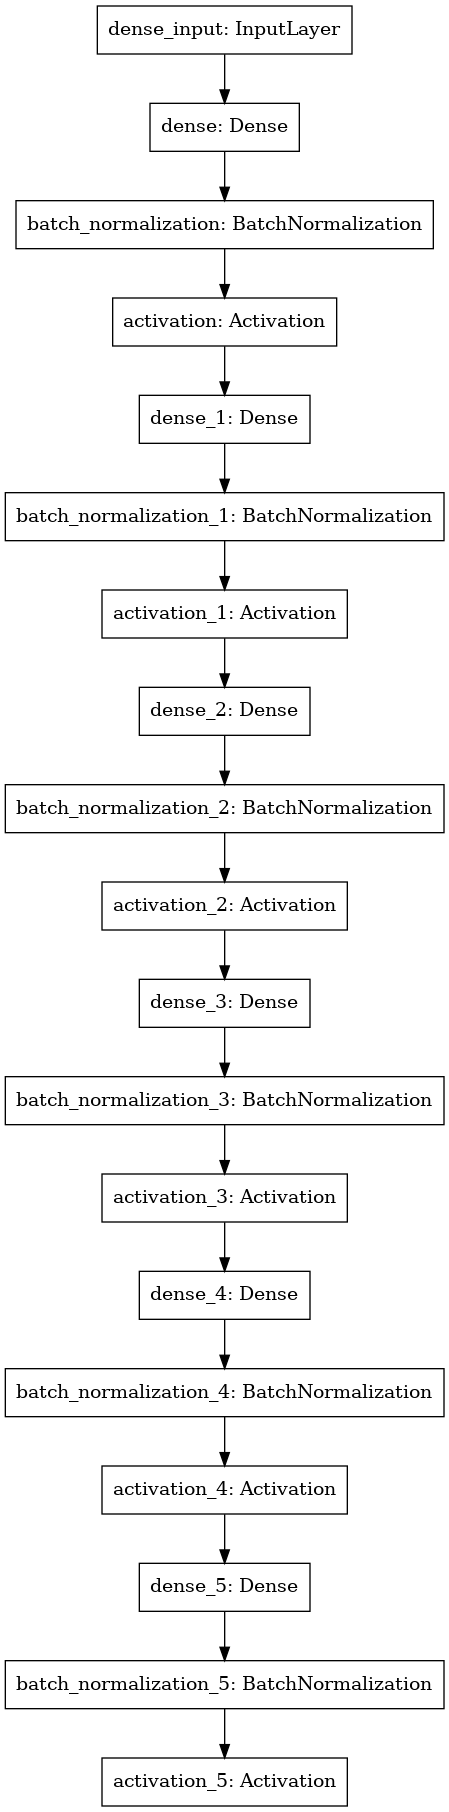

In [26]:
#using (a) Sequential Class 
ffnn=Sequential() 
ffnn.add(Dense(units=512, input_shape=(784,))) 
ffnn.add(BatchNormalization()) 
ffnn.add(Activation('relu'))
ffnn.add(Dense(units=256))
ffnn.add(BatchNormalization())
ffnn.add(Activation('relu'))
ffnn.add(Dense(units=128))
ffnn.add(BatchNormalization())
ffnn.add(Activation('relu'))
ffnn.add(Dense(units=64))
ffnn.add(BatchNormalization())
ffnn.add(Activation('relu'))
ffnn.add(Dense(units=32))
ffnn.add(BatchNormalization())
ffnn.add(Activation('relu'))
ffnn.add(Dense(units=10))
ffnn.add(BatchNormalization())
ffnn.add(Activation('softmax')) #to output probability vector

#Set compile settings
ffnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#display summary of the model
ffnn.summary()

#display the model
tf.keras.utils.plot_model(ffnn)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0     

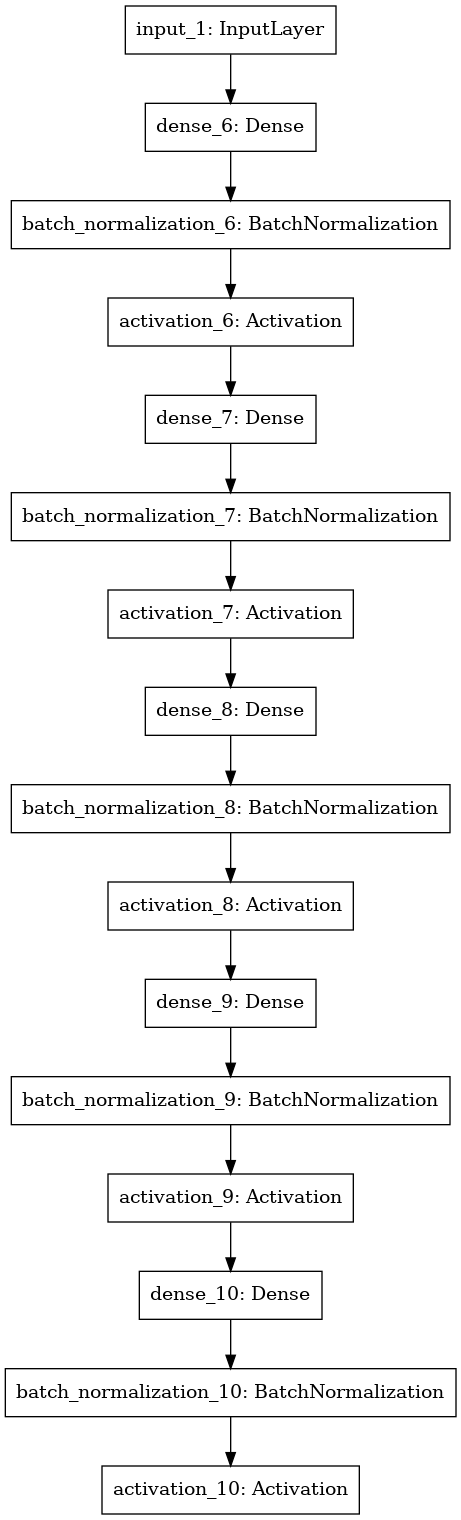

In [27]:
#(b) Model Class API
inp=Input(shape=(784,))

dense1=Dense(units=512)(inp)
batch1=BatchNormalization()(dense1)
a1=Activation('relu')(batch1)

dense2=Dense(units=256)(a1)
batch2=BatchNormalization()(dense2)
a2=Activation('relu')(batch2)

dense3=Dense(units=128)(a2)
batch3=BatchNormalization()(dense3)
a3=Activation('relu')(batch3)

dense4=Dense(units=32)(a3)
batch4=BatchNormalization()(dense4)
a4=Activation('relu')(batch4)

dense5=Dense(units=10)(a4)
batch5=BatchNormalization()(dense5)
a5=Activation('softmax')(batch5)


ffnn1=Model(inputs=inp, outputs=a5)
ffnn1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

ffnn1.summary()
tf.keras.utils.plot_model(ffnn1)


1) Fitting model FFNN (sequential)

In [28]:
ffnn.fit(x=X_train, y=y_train, epochs=150, callbacks=[reduceLROnPlateau], batch_size=120, validation_split=0.2)

2022-05-04 12:30:47.699071: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
280/280 [==============================] - 3s 5ms/step - loss: 0.5122 - accuracy: 0.9132 - val_loss: 0.4887 - val_accuracy: 0.9105
Epoch 2/150
280/280 [==============================] - 1s 4ms/step - loss: 0.2340 - accuracy: 0.9700 - val_loss: 0.1960 - val_accuracy: 0.9673
Epoch 3/150
280/280 [==============================] - 1s 4ms/step - loss: 0.1570 - accuracy: 0.9788 - val_loss: 0.1658 - val_accuracy: 0.9675
Epoch 4/150
280/280 [==============================] - 1s 5ms/step - loss: 0.1137 - accuracy: 0.9843 - val_loss: 0.1625 - val_accuracy: 0.9626
Epoch 5/150
280/280 [==============================] - 1s 5ms/step - loss: 0.0886 - accuracy: 0.9873 - val_loss: 0.1296 - val_accuracy: 0.9720
Epoch 6/150
280/280 [==============================] - 1s 4ms/step - loss: 0.0739 - accuracy: 0.9881 - val_loss: 0.2124 - val_accuracy: 0.9419
Epoch 7/150
280/280 [==============================] - 1s 4ms/step - loss: 0.0565 - accuracy: 0.9916 - val_loss: 0.1186 - val_accuracy: 0.9705

2) Fitting model FFNN (Model API )

In [29]:
ffnn1.fit(x=X_train, y=y_train, epochs=100, callbacks=[reduceLROnPlateau], batch_size=120, validation_split=0.2)

Epoch 1/100
280/280 [==============================] - 2s 5ms/step - loss: 0.4870 - accuracy: 0.9237 - val_loss: 0.4498 - val_accuracy: 0.9163
Epoch 2/100
280/280 [==============================] - 1s 4ms/step - loss: 0.2310 - accuracy: 0.9729 - val_loss: 0.2286 - val_accuracy: 0.9608
Epoch 3/100
280/280 [==============================] - 1s 4ms/step - loss: 0.1487 - accuracy: 0.9835 - val_loss: 0.1727 - val_accuracy: 0.9688
Epoch 4/100
280/280 [==============================] - 1s 4ms/step - loss: 0.1093 - accuracy: 0.9867 - val_loss: 0.1705 - val_accuracy: 0.9637
Epoch 5/100
280/280 [==============================] - 1s 4ms/step - loss: 0.0811 - accuracy: 0.9906 - val_loss: 0.1247 - val_accuracy: 0.9735
Epoch 6/100
280/280 [==============================] - 1s 4ms/step - loss: 0.0685 - accuracy: 0.9901 - val_loss: 0.1581 - val_accuracy: 0.9582
Epoch 7/100
280/280 [==============================] - 1s 4ms/step - loss: 0.0515 - accuracy: 0.9936 - val_loss: 0.1669 - val_accuracy: 0.9565

In [30]:
predictions=ffnn.predict(X_test) #make predictions on test images
print(predictions.shape) #This will be 28K x 10. For each test image, probability of 10 classes

#Decide class label for each test image based on max probability.
#This will be vector of size 28K. 
predictions=np.argmax(predictions,axis=1) 
print(predictions.shape) 


#read sample_submission.csv in the dataframe. The dataframe will have 2 columns ImageId and Label
sub=pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv', header='infer')

#

sub["Label"]=predictions

sub.to_csv('submission.csv', index=False)


(28000, 10)
(28000,)
